In this notebook, we're going to work with dates.

Let's get started!

# Get our environment set up

The first thing we'll need to do is load in the libraries and dataset we'll be using. We'll be working with a dataset that contains information on landslides that occured between 2007 and 2016.  In the [**following exercise**](https://www.kaggle.com/kernels/fork/10824403), you'll apply your new skills to a dataset of worldwide earthquakes.

In [2]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
landslides = pd.read_csv("../input/landslide-events/catalog.csv")

# set seed for reproducibility
np.random.seed(0)

Now we're ready to look at some dates!

# Check the data type of our date column

We begin by taking a look at the first five rows of the data.

In [3]:
landslides.shape

(1693, 23)

In [4]:
landslides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1693 non-null   int64  
 1   date                  1690 non-null   object 
 2   time                  629 non-null    object 
 3   continent_code        164 non-null    object 
 4   country_name          1693 non-null   object 
 5   country_code          1693 non-null   object 
 6   state/province        1692 non-null   object 
 7   population            1693 non-null   int64  
 8   city/town             1689 non-null   object 
 9   distance              1692 non-null   float64
 10  location_description  551 non-null    object 
 11  latitude              1692 non-null   float64
 12  longitude             1692 non-null   float64
 13  geolocation           1692 non-null   object 
 14  hazard_type           1693 non-null   object 
 15  landslide_type       

In [5]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


We'll be working with the "date" column from the `landslides` dataframe. Let's make sure it actually looks like it contains dates.

In [6]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


Yep, those are dates! But just because I, a human, can tell that these are dates doesn't mean that Python knows that they're dates. Notice that at the bottom of the output of `head()`, you can see that it says that the data type of this  column is "object". 

> Pandas uses the "object" dtype for storing various types of data types, but most often when you see a column with the dtype "object" it will have strings in it. 

If you check the pandas dtype documentation [here](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes), you'll notice that there's also a specific `datetime64` dtypes. Because the dtype of our column is `object` rather than `datetime64`, we can tell that Python doesn't know that this column contains dates.

We can also look at just the dtype of a column without printing the first few rows:

In [7]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

You may have to check the [numpy documentation](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind) to match the letter code to the dtype of the object. "O" is the code for "object", so we can see that these two methods give us the same information.

# Convert our date columns to datetime

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it *is* recognized as a date. This is called ***parsing dates*** because we're taking in a string and identifying its component parts.

We can determine what the format of our dates are with a guide called ["strftime directive"](http://strftime.org/). The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are [lots of possible parts of a date](http://strftime.org/), but the most common are `%d` for day, `%m` for month, `%y` for a two-digit year and `%Y` for a four digit year.

Some examples:

 * 1/17/07 has the format "%m/%d/%y"
 * 17-1-2007 has the format "%d-%m-%Y"
 
Looking back up at the head of the "date" column in the landslides dataset, we can see that it's in the format "month/day/two-digit year", so we can use the same syntax as the first example to parse in our dates: 

In [8]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

Now when I check the first few rows of the new column, I can see that the dtype is `datetime64`. I can also see that my dates have been slightly rearranged so that they fit the default order datetime objects (year-month-day).

In [9]:
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

Now that our dates are parsed correctly, we can interact with them in useful ways.

___
* **What if I run into an error with multiple date formats?** While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you can have pandas try to infer what the right date format should be. You can do that like so:

`landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)`

* **Why don't you always use `infer_datetime_format = True?`** There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.

---

# Select the day of the month

Now that we have a column of parsed dates, we can extract information like the day of the month that a landslide occurred.

In [10]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

If we tried to get the same information from the original "date" column, we would get an error: `AttributeError: Can only use .dt accessor with datetimelike values`.  This is because `dt.day` doesn't know how to deal with a column with the dtype "object". Even though our dataframe has dates in it, we have to parse them before we can interact with them in a useful way.

# Plot the day of the month to check the date parsing

One of the biggest dangers in parsing dates is mixing up the months and days. The `to_datetime()` function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense. 

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

In [12]:
day_of_month_landslides.isnull().sum()

3

<AxesSubplot:xlabel='date_parsed'>

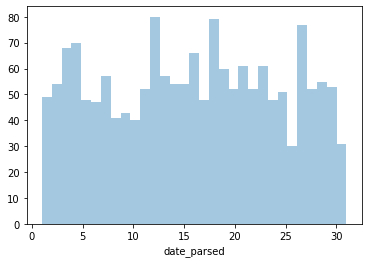

In [15]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde = False, bins = 31)

Yep, it looks like we did parse our dates correctly & this graph makes good sense to me.

# Your turn

Write code to [**parse the dates**](https://www.kaggle.com/kernels/fork/10824403) in a dataset of worldwide earthquakes.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-cleaning/discussion) to chat with other learners.*